# Word Embeddings

In this notebook, we will use the popular [gensim](https://radimrehurek.com/gensim/) library to demonstrate static word embeddings.

In [1]:
import gensim
import gensim.downloader as api

In [2]:
# load pre-trained embedding model
model = api.load("glove-wiki-gigaword-300")

## Countries and Capitals

In [3]:
# Find the closest words to the embedding vector
model.similar_by_vector(model['spain'], topn=10)

[('spain', 1.0),
 ('spanish', 0.7018521428108215),
 ('portugal', 0.6837542653083801),
 ('madrid', 0.6207928657531738),
 ('morocco', 0.5984663367271423),
 ('argentina', 0.5970551371574402),
 ('italy', 0.5794763565063477),
 ('france', 0.5735931992530823),
 ('barcelona', 0.5564866065979004),
 ('valencia', 0.5475435853004456)]

In [4]:
new_vector = model['spain'] - model['madrid'] + model['paris']
model.similar_by_vector(new_vector, topn=10)

[('france', 0.7788555026054382),
 ('paris', 0.6755749583244324),
 ('french', 0.6073658466339111),
 ('spain', 0.6002400517463684),
 ('belgium', 0.5509710907936096),
 ('prohertrib', 0.5404820442199707),
 ('europe', 0.5105734467506409),
 ('britain', 0.4912627339363098),
 ('italy', 0.4869527220726013),
 ('greece', 0.46224045753479004)]

In [5]:
new_vector = model['spain'] - model['madrid'] + model['berlin']
model.similar_by_vector(new_vector, topn=10)

[('germany', 0.7243330478668213),
 ('berlin', 0.6511068344116211),
 ('german', 0.5675503611564636),
 ('austria', 0.5670680999755859),
 ('poland', 0.5424329042434692),
 ('spain', 0.5124938488006592),
 ('europe', 0.4960699677467346),
 ('belgium', 0.4838774502277374),
 ('britain', 0.4805854856967926),
 ('hungary', 0.4778807461261749)]

## Queen - Woman + Man = ? 

In [6]:
# Find the closest word to the new vector
print(model.similar_by_vector(model['queen'], topn=10))

[('queen', 1.0), ('elizabeth', 0.6771446466445923), ('princess', 0.6356763243675232), ('king', 0.6336469054222107), ('monarch', 0.5814187526702881), ('royal', 0.543052613735199), ('majesty', 0.5350356698036194), ('victoria', 0.5239555835723877), ('throne', 0.509709894657135), ('lady', 0.5045416355133057)]


In [7]:
# Perform vector arithmetic: Queen - Woman + Man
new_vector = model['queen'] - model['woman'] + model['man']

# Find the closest word to the new vector
print(model.similar_by_vector(new_vector, topn=10))

[('queen', 0.7847283482551575), ('king', 0.6635369062423706), ('ii', 0.5123060345649719), ('majesty', 0.5093693733215332), ('monarch', 0.4966937005519867), ('prince', 0.4964632987976074), ('royal', 0.4811263382434845), ('elizabeth', 0.48111575841903687), ('vi', 0.4598718583583832), ('crown', 0.44824138283729553)]


## Disorders

In [8]:
words = [
    ("asthma", "lungs"),
    ("bronchitis", "lungs"),
    ("pneumonia", "lungs"),
    ("emphysema", "lungs"),
    ("tuberculosis", "lungs"),
    ("covid", "lungs"),
    ("apnea", "lungs"),
    ("influenza", "lungs"),
    ("pneumothorax", "lungs"),
    ("arrhythmia", "heart"),
    ("cardiomyopathy", "heart"),
    ("myocarditis", "heart"),
    ("angina", "heart"),
    ("hypertension", "heart"),
    ("epilepsy", "brain"),
    ("migraine", "brain"),
    ("encephalitis", "brain"),
    ("meningitis", "brain"),
    ("parkinson", "brain"),
    ("alzheimer", "brain"),
    ("stroke", "brain"),
    ("vertigo", "brain"),
    ("aneurysm", "brain"),
    ("gastritis", "intestine"),
    ("ulcer", "intestine"),
    ("gastroenteritis", "intestine"),
    ("diverticulitis", "intestine"),
    ("colitis", "intestine"),
    ("dermatitis", "skin"),
    ("eczema", "skin"),
    ("psoriasis", "skin"),
    ("acne", "skin"),
    ("cellulitis", "skin"),
    ("melanoma", "skin"),
    ("herpes", "skin"),
    ("warts", "skin"),
    ("glaucoma", "eyes"),
    ("cataracts", "eyes"),
    ("conjunctivitis", "eyes"),
    ("myopia", "eyes"),
    ("hyperopia", "eyes"),
    ("astigmatism", "eyes"),
    ("retinopathy", "eyes"),
    ("trachoma", "eyes"),
    ("otitis", "ears"),
    ("meniere", "ears"),
    ("tinnitus", "ears"),
    ("deafness", "ears")
]

classes = list(set([w[1] for w in words]))
classes

['skin', 'eyes', 'intestine', 'ears', 'lungs', 'brain', 'heart']

In [9]:
# OOV words
oov_words = [word[0] for word in words if not word[0] in model]
print(oov_words)

['covid']


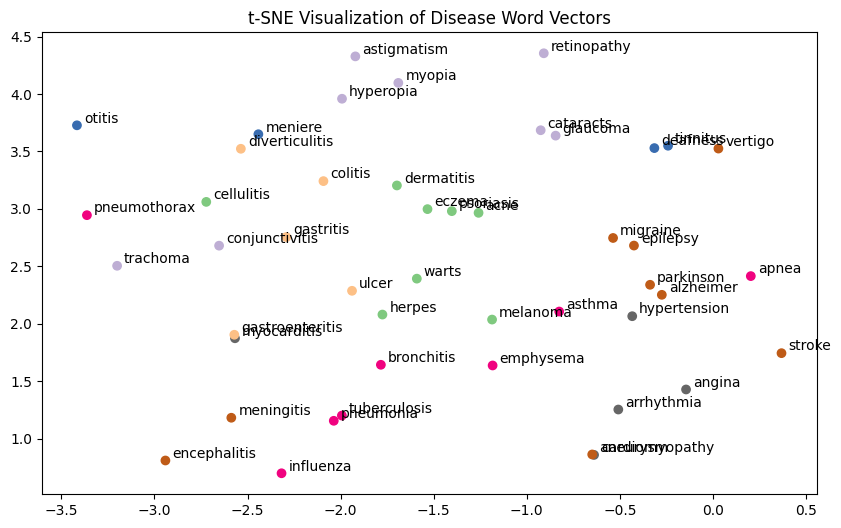

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Exclude OOV words
model_words = [word for word in words if not word[0] in oov_words]

# Extract word embeddings
word_vectors = np.array([model[word[0]] for word in model_words])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(X=word_vectors)

# Plot in 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=[classes.index(clz) for _, clz in model_words], cmap='Accent')
for i, (word, clazz) in enumerate(model_words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), 
                     xytext=(5, 2), textcoords='offset points')
plt.title('t-SNE Visualization of Disease Word Vectors')
plt.show()